Installing libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

Download assets

In [2]:
def download_and_unzip(url, path):
    print("Downloading assets...")

    urlretrieve(url, path)

    try:
        with ZipFile(path) as z:
            z.extractall(os.path.split(path)[0])
        print("Downloading finish.")    
    except Exception as e:
        print("Invalid file.", e)

In [3]:
asset_url = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB1.zip")

# If asset don't exist, download
if not os.path.exists(asset_path):
    download_and_unzip(asset_url,asset_path)


Displaying Images

In [4]:
Image(filename="checkerboard_18x18.png")

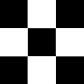

In [5]:
Image(filename="checkerboard_84x84.jpg")

### Image Information

Pixel Values

In [6]:
# Read image and printing it will show pixel values
checkers = cv2.imread("checkerboard_18x18.png", 0)
print(checkers)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

`cv2.imread` only has two parameters, a file name and an optional one called flags which can manipulate the image to a certain format/filter.

A few of the flags are:

- cv2.IMREAD_GRAYSCALE or 0:   Turns into grayscale (white-black hue). Matrix values represented as 8-bit pixel values (0-255 / white-black)
- cv2.IMREAD_COLOR or 1 (default):   Colored image. Matrix values represented as RGB values (so it turns into 3D matrices)
- cv2.IMREAD_UNCHANGED or -1:   Loads unaffected image into an alpha channel (opacity in relation to background)

Image Attributes

In [7]:
# print size of image (pixels)
print("Image size (height x width) is", checkers.shape)

# print data type of image pixels
print("Image data type is", checkers.dtype) 

Image size (height x width) is (18, 18)
Image data type is uint8


Display Image using Matplotlib

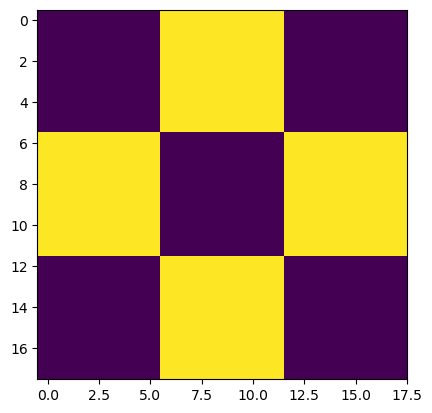

In [8]:
plt.imshow(checkers)

Notice how despite the image is defined as a grayscale in `imread`, the image is shown colored in mpl. We need to use an additional parameter called `cmap` in order to create a color map or filter to the image:

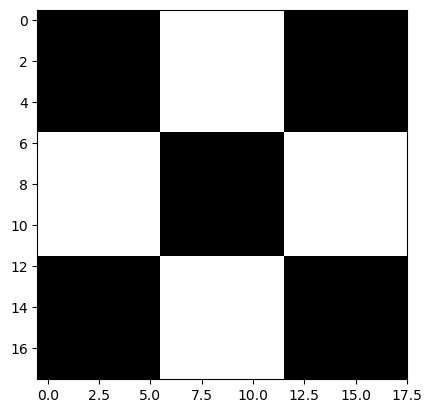

In [9]:
plt.imshow(checkers, cmap="gray")

Let's try with a colored image and show it using matplotlib

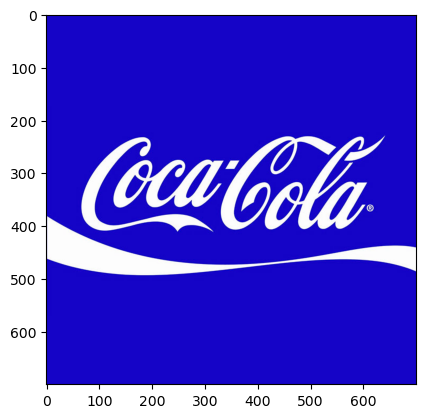

In [10]:
cola = cv2.imread("coca-cola-logo.png", 1)
plt.imshow(cola)

Why is it blue and not red? It's because `cv2.imread` is in BGR format by default and not the usual RGB format. To switch it to RGB, there are two ways:

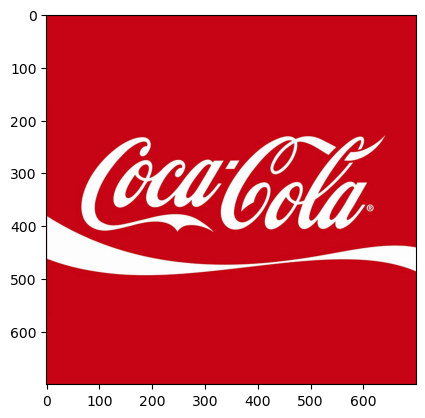

In [11]:
# Method 1: Array Manipulation
cola_reverse_array = cola[:, :, ::-1]
plt.imshow(cola_reverse_array)

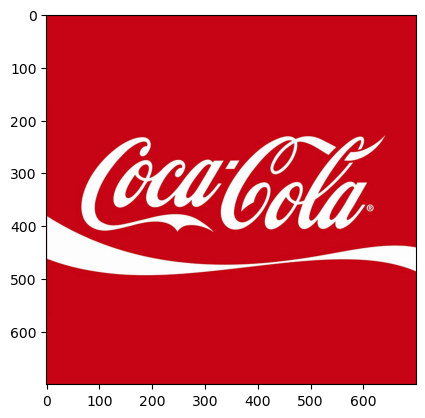

In [12]:
# Method 2: Convert Color Function
cola_converted = cv2.cvtColor(cola, cv2.COLOR_BGR2RGB)
plt.imshow(cola_converted)

In RGB images, there exists three channels that make up RGB: red channel, green channel and blue channel. Combined they create normal RGB images. These individual channels can be partioned through `cv2.split()` and `cv2.merge()`.

Text(0.5, 1.0, 'Merged Image')

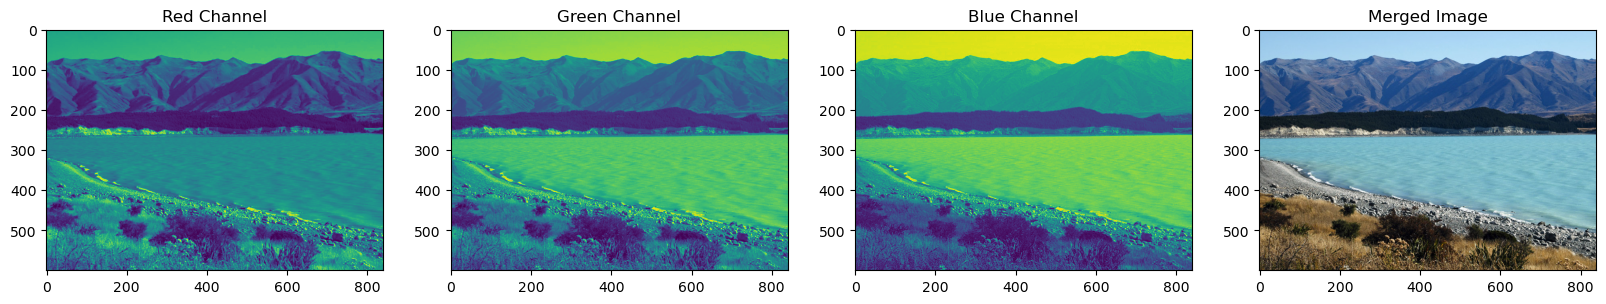

In [13]:
nz = cv2.imread("New_Zealand_Lake.jpg", 1)
b, g, r = cv2.split(nz) # remember that cv2 by default is in BGR not RGB

plt.figure(figsize=[20, 5])

# Red Channel
plt.subplot(141)
plt.imshow(r)
plt.title("Red Channel")

# Green Channel
plt.subplot(142)
plt.imshow(g)
plt.title("Green Channel")

# Blue Channel
plt.subplot(143)
plt.imshow(b)
plt.title("Blue Channel")

# Merged Channels
merged = cv2.merge((r, g, b))
plt.subplot(144)
plt.imshow(merged)
plt.title("Merged Image")

Since channels can be splitted, this means that we can adjust values of the splitted channels and merge it back to create an altered image depending on what was altered. For example, we can alter the hue in an HSV (hue saturation value) map and merge it back to create an altered image.

Text(0.5, 1.0, 'Merged Image')

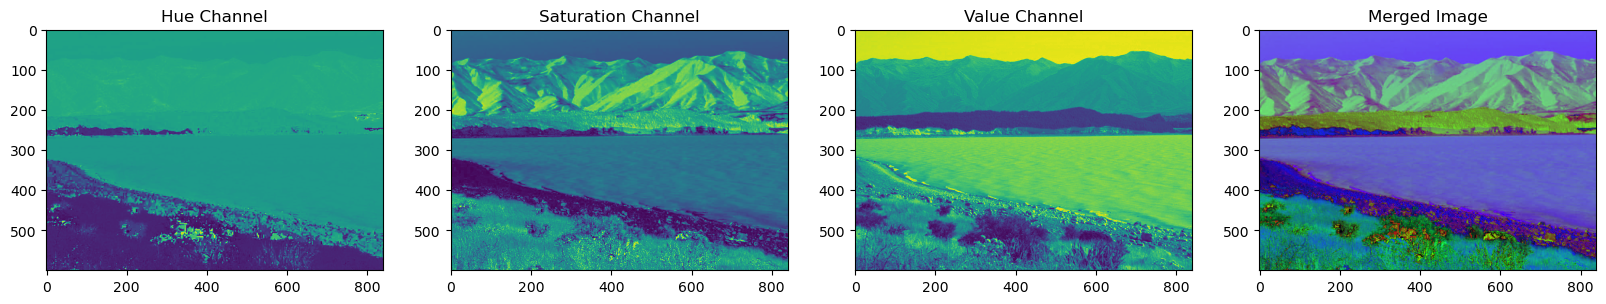

In [35]:
nz_hsv = cv2.cvtColor(nz, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(nz_hsv)

plt.figure(figsize=[20,5])

# Hue Channel
plt.subplot(141)
plt.imshow(h)
plt.title("Hue Channel")

# Saturation Channel
plt.subplot(142)
plt.imshow(s)
plt.title("Saturation Channel")

# Value Channel
plt.subplot(143)
plt.imshow(v)
plt.title("Value Channel")

# Merged Channels
merged = cv2.merge((h, s, v)) # not rgb because its in hsv format
plt.subplot(144)
plt.imshow(merged)
plt.title("Merged Image")

Text(0.5, 1.0, 'RGB Image')

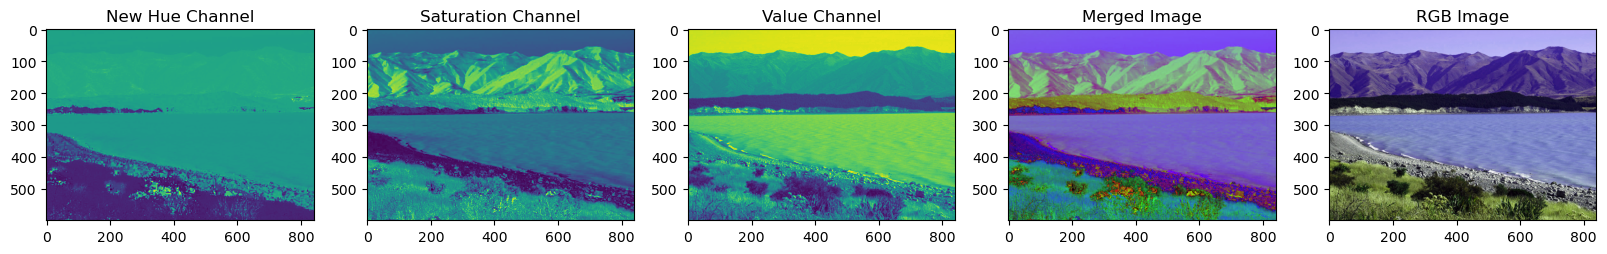

In [36]:
h_new = h + 20
nz_hsv_merged = cv2.merge((h_new, s, v))
nz_rgb = cv2.cvtColor(nz_hsv_merged, cv2.COLOR_HSV2RGB)


plt.figure(figsize=[20,5])

# Hue Channel
plt.subplot(151)
plt.imshow(h_new)
plt.title("New Hue Channel")

# Saturation Channel
plt.subplot(152)
plt.imshow(s)
plt.title("Saturation Channel")

# Value Channel
plt.subplot(153)
plt.imshow(v)
plt.title("Value Channel")

# Merged Channels
merged = cv2.merge((h_new, s, v)) # not rgb because its in hsv format
plt.subplot(154)
plt.imshow(merged)
plt.title("Merged Image")

# RGB Channel
plt.subplot(155)
plt.imshow(nz_rgb)
plt.title("RGB Image")

To save and download an image that we made, we can use `cv2.imwrite`

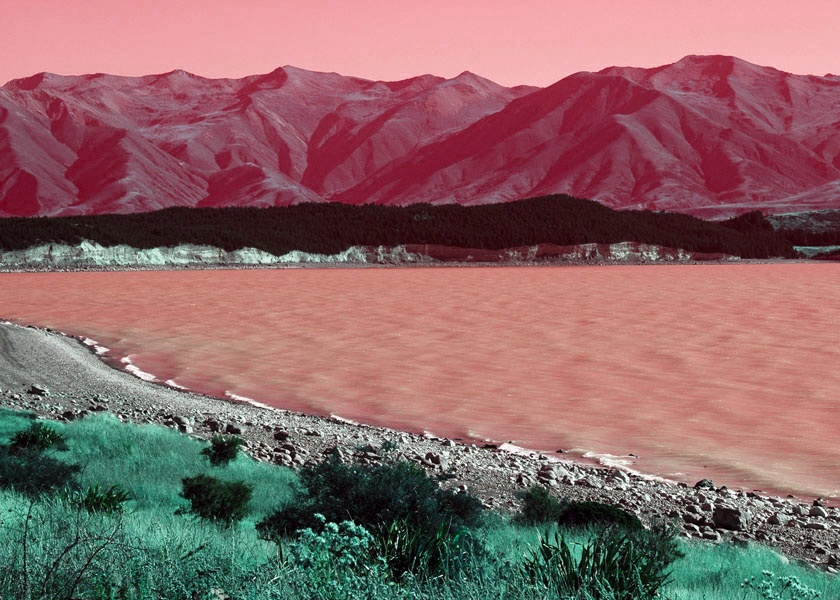

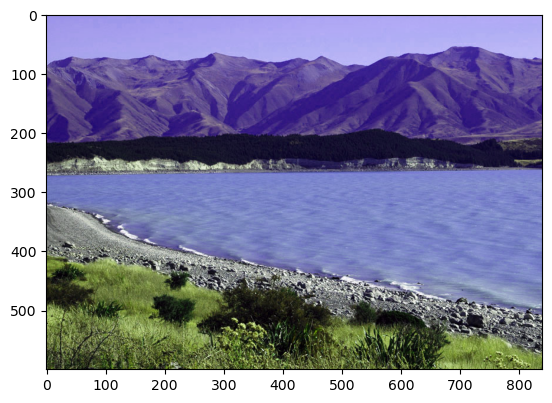

In [45]:
cv2.imwrite("nz_alt.jpg", nz_rgb)
plt.imshow(nz_rgb)

Image(filename="nz_alt.jpg") # why tf is it different

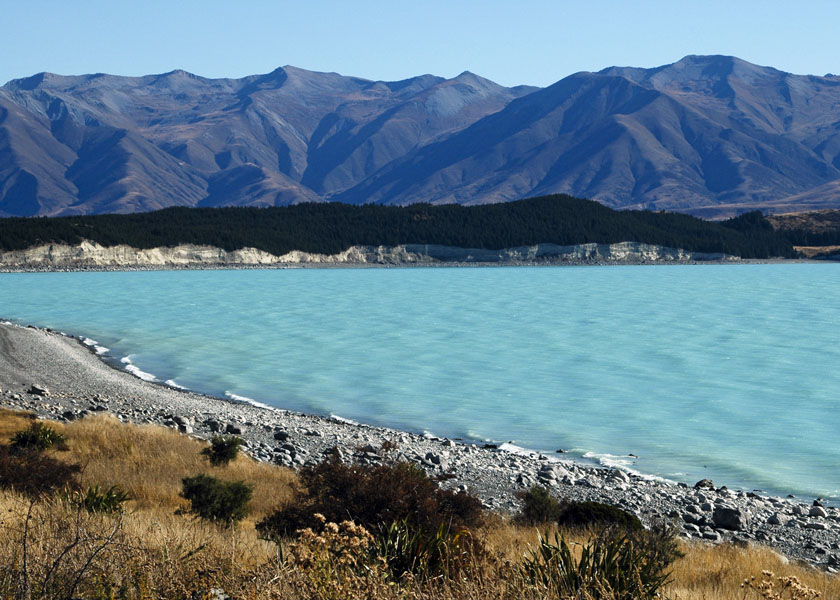

In [34]:
Image(filename="New_Zealand_Lake.jpg")